Dataset Details
---

1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumption in miles per gallon,
    to be predicted in terms of 3 multivalued discrete and 5 continuous
    attributes." (Quinlan, 1993)

In [199]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
%matplotlib inline
#Author Vignesh ( Testing Matplotlib and Linear Regression )

In [200]:
file_name = "UCI_Datasets/auto-mpg.data"
with open(file_name, 'rb') as data:
    dataset_x = []
    dataset_y = []
    for row in data.read().split("\n"):
        row = row.split("\t")
        carname = row[-1]
        row = row[0]
        cur_data = []
        error = False
        for part in row.split(" "):
            if(part == ""):continue
            if(part[0].isalpha() or part[0] == "?"):
                error = True
                break
            cur_data.append(float(part))
        if(error):continue
        dataset_x.append(cur_data)
        dataset_y.append(carname)
dataset_y = np.array(dataset_y[:-1])
dataset_x = np.array(dataset_x[:-1])
        
#Database Test

#print dataset_x[-2]
#print dataset_y[-2]
        

Attribute Information:
----
X-Values Description
    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete

Y-Values Description

    1. car name:      string (unique for each instance)

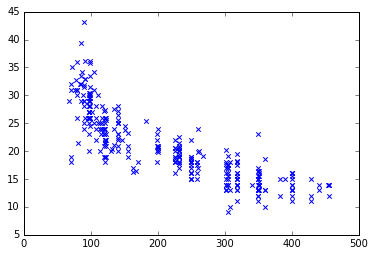

In [201]:
# Plot of Engine Displacement vs Miles Per Gallon

Displacement = dataset_x[: , 2][:300]
Efficieny = dataset_x[: , 0][:300]
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(x, y, color='lightblue', linewidth=3)
ax.scatter(Displacement , Efficieny,color='b',marker='x')
plt.show()

# Increase in Engine Displacement decreases Efficiency

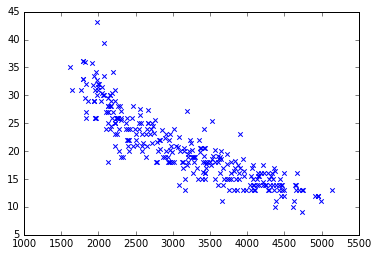

In [202]:
# Plot of Weight vs Miles Per Gallon

Weight = dataset_x[: , 4][:300]
Efficieny = dataset_x[: , 0][:300]
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(x, y, color='lightblue', linewidth=3)
ax.scatter(Weight , Efficieny,color='b',marker='x')
plt.show()

# Efficiency Decreases with Increased Weight

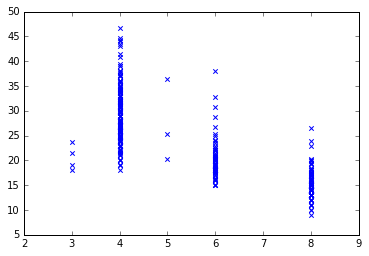

In [203]:
# Plot of Cylinder vs Miles Per Gallon

Cylinders = dataset_x[: , 1]
Efficieny = dataset_x[: , 0]
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(x, y, color='lightblue', linewidth=3)
ax.scatter(Cylinders , Efficieny,color='b',marker='x')
plt.show()

# Inconclusive Data

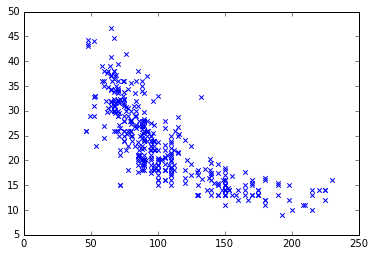

In [204]:
# Plot of Horse Power vs Miles Per Gallon

Displacement = dataset_x[: , 3]
Efficieny = dataset_x[: , 0]
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(x, y, color='lightblue', linewidth=3)
ax.scatter(Displacement , Efficieny,color='b',marker='x')
plt.show()

# Efficienct decreases generally with increase in Horsepower

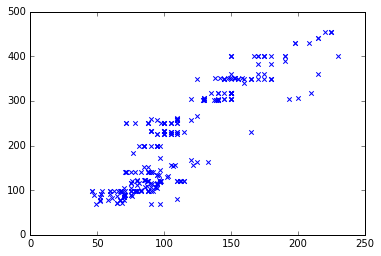

In [205]:
# Plot of Engine Displacement vs HorsePower

Displacement = dataset_x[: , 3][:300]
Horsepower = dataset_x[: , 2][:300]
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(x, y, color='lightblue', linewidth=3)
ax.scatter(Displacement , Horsepower,color='b',marker='x')
plt.show()

# Engine Displacement almost linearly increases with Horsepower

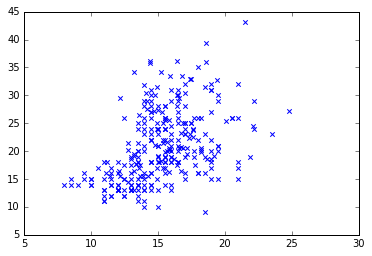

In [206]:
# Plot of Acceleration vs Miles Per Gallon

Acceleration = dataset_x[: , 5][:300]
Efficiency = dataset_x[: , 0][:300]
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot(x, y, color='lightblue', linewidth=3)
ax.scatter(Acceleration , Efficiency,color='b',marker='x')
plt.show()

# Not A Valid RelationShip Directly

Conclusion
----

Using Weight , Engine Displacement , Horse Power and No Of Cylinders to Estimate The Milege ( Miles in one Gallon )

Implementation
---

Using Linear Regression in TensorFlow to Create a model with the provided data

In [ ]:
# Initialisation
data_x = dataset_x[: , (2,3,4)][:300]
num_data = len(data_x)
data_y = dataset_x[: , (0)][:300]
tf.set_random_seed(777)  # for reproducibility


In [ ]:
# Tensorflow Code


X = tf.placeholder(tf.float32 , shape=[None,3])
Y = tf.placeholder(tf.float32 , shape=[None])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

model = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(model - Y)) 

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-8)
train = optimizer.minimize(cost)


In [ ]:
# Executing Code

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(5001):
    c , _  = sess.run([cost, train] , feed_dict = {X : data_x , Y : data_y} )
    if(i % 1000  == 0):print c

In [ ]:
# Testing Code
print sess.run(model , feed_dict={X : [[120.0,79.0,2625.0]] })

print sess.run(model , feed_dict={X : [[119.,82.0,2720.0]] })
sess.close()

# Results and Accuracy
The model Dosent work perfectly in a Linear Regression

Trying out polynomial regression to fit the curve perfectly

In [244]:
# Initialisation
data_x = dataset_x[: , (2,3,4)]
num_data = len(data_x)
data_y = dataset_x[: , 0]
tf.set_random_seed(777)  # for reproducibility


X = tf.placeholder(tf.float64 , shape=[None,3])
Y = tf.placeholder(tf.float64 , shape=[None])

B = tf.Variable(dtype=tf.float64 ,initial_value = tf.zeros([1] , dtype=tf.float64), name='bias')
W1 = tf.Variable(tf.random_normal([3,1] ,dtype=tf.float64 ),dtype=tf.float64, name='weight_1')
W2 = tf.Variable(tf.random_normal([3,1] , dtype=tf.float64),dtype=tf.float64, name='weight_2')
W3 = tf.Variable(tf.random_normal([3,1] , dtype=tf.float64),dtype=tf.float64, name='weight_3')

model = tf.matmul( tf.pow(X , 3) , W3 ) +\
        tf.matmul( tf.pow(X , 2) , W2 ) + tf.matmul(X , W1) + B 
    
cost = tf.reduce_sum( tf.abs( model - Y )) / num_data

learning_rate = 1e-14

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [246]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for i in range(10001):
    c , _  = sess.run([cost, optimizer] , feed_dict = { X : data_x , Y : data_y} )
    if(np.isnan(c) ):print "Broken Down at {}".format(i) ; break
    if(i % 1000 == 0):print c


5.37685946995e+12
1.37515718251e+12
1.37515718251e+12
1.37515718251e+12
1.37515718251e+12
1.37515718251e+12
1.37515718251e+12
1.37515718251e+12
1.37515718251e+12
1.37515718251e+12
1.37515718251e+12


In [172]:
print sess.run(W1)

print sess.run(model , feed_dict={X : [[120.0,79.0,2625.0]] })

print sess.run(model , feed_dict={X : [[119.,82.0,2720.0]] })


[[  1.15625959e-09]
 [  2.12976992e-09]
 [  6.96424203e-08]]
[[ 12.75132119]]
[[ 13.69271927]]


In [162]:
sess.close()